## <font color="red">練習2</font>

1. polyline (折線) 由連接連續 vertices (頂點) 的 segments (線段) 組成，若折線的起點和終點相同且線段沒有交錯，將構成一個封閉的多邊形，例如：polygon.dat。
2. <mark>撰寫Python程式讀取 polygon.dat，計算多邊形的extent ($x_{min}, y_{min}, x_{max}, y_{max}$)、重心(center)、周長與面積，重心的定義如下。<mark>
3. 程式需盡可能將會重複用到的部分寫成 function。
4. 程式只用到目前(Chapter 1~9)所學到的東西，不可使用 list。
5. 請自行設計一個看起來清楚的輸出資料格式。
6. 畫出程式的流程圖。

$$(X_{center}, Y_{center}) = (\frac{\Sigma_1^nx_i}{n}, \frac{\Sigma_1^ny_i}{n})$$

<font color="red">提示：(1) $n$ 個頂點會構成 $n-1$ 個線段，利用迴圈讀取每一個點的 $(x,y)$ 坐標資料，需記住前一個點的 $(x_p,y_p)$ 坐標才能計算線段的長度；(2)計算多邊形面積可以先將多邊形切割成相鄰兩點與 X 軸的梯形，然後將每一個梯形的面積相加，方法請參考先前的 plot 筆記本。</font>


大致上的處理流程如下：

1. 讀進第1個點之 $(x,y)$ 只有一個點還不能計算，先將其指派給 $(x_p, y_p)$
2. 繼續讀下一個點之 $(x,y)$，可以由 $(x_p, y_p)$ 和 $(x,y)$ 計算長度 L，和梯形面積 A
3. 將 $(x,y)$ 指派給 $(x_p, y_p)$
4. 繼續步驟 2~3，過程中將 L 和 A 累加

按照上述流程就可以算出多邊形的周長和面積，3個點、300個點，300萬個點都沒有問題。


<mark> <font size=6 color="darkblue">面積 周長 </font> <mark>

In [1]:
fin=open('polygon.dat')

n=fin.readline()  #n=10

for i in range(int(n)):   # n=10
    n2=fin.readline()     # n2=5
    
    k=0
    L=0
    A=0
    
    for i in range(int(n2)-1): # n2=5    ####  要減 1 減少 計算的次數
        
        if k==0:
            sol = fin.readline()  #sol 指定 xp ,yp
            t1 ,t2 =sol.split()
            xp = float(t1)
            yp = float(t2)
            k=k+1

        line = fin.readline()
        s1 , s2 = line.split()
        x = float(s1)
        y = float(s2)

        L+=((x-xp)**2+(y-yp)**2)**(1/2)
        A+=((y+yp)*(xp-x))/2
        
        xp=x
        yp=y
    
    
    print(f"perimeter:{abs(L):9.3f}")
    print(f"Area:   {abs(A):12.3f}")


perimeter:  182.086
Area:       1948.697
perimeter:  828.986
Area:      34371.628
perimeter:  955.786
Area:      53924.093
perimeter: 1351.887
Area:      22360.769
perimeter:  796.987
Area:      13398.278
perimeter: 1747.951
Area:     111544.954
perimeter:  632.424
Area:      18702.838
perimeter: 1682.294
Area:      49295.113
perimeter: 1007.765
Area:      36525.305
perimeter: 1981.319
Area:     175467.781


<mark> <font size=6 color="darkblue">面積 周長 重心 </font> <mark>

In [2]:
fin=open('polygon.dat')

n=fin.readline()  #n=10

for i in range(int(n)):   # n=10
    n2=fin.readline()     # n2=5
    
    k=0
    L=0
    A=0
    c_x=0  # 重心 x
    c_y=0  # 重心 y
    
    for i in range(int(n2)-1): # n2=5    ####  要減 1 減少 計算的次數
        
        if k==0:
            sol = fin.readline()  #sol 指定 xp ,yp
            t1 ,t2 =sol.split()
            xp = float(t1)
            yp = float(t2)
            k=k+1

        line = fin.readline()
        s1 , s2 = line.split()
        x = float(s1)
        y = float(s2)

        L+=((x-xp)**2+(y-yp)**2)**(1/2)
        A+=((y+yp)*(xp-x))/2
        
        c_x+=x # 重心
        c_y+=y
        
        xp=x
        yp=y
    G_x=c_x/(int(n2)-1)
    G_y=c_y/(int(n2)-1)

    print("座標點數",int(n2))
    print(f"perimeter:{abs(L):9.3f}")
    print("")
    print(f"Area:   {abs(A):12.3f}")
    print("")
    print(f"CG: ({G_x:8.3f},{G_y:9.3f})")
    print("______________________________")


座標點數 5
perimeter:  182.086

Area:       1948.697

CG: ( 333.527, 3280.343)
______________________________
座標點數 6
perimeter:  828.986

Area:      34371.628

CG: (1169.292, 3297.105)
______________________________
座標點數 42
perimeter:  955.786

Area:      53924.093

CG: (1523.744,11391.229)
______________________________
座標點數 136
perimeter: 1351.887

Area:      22360.769

CG: (-870.638,11740.044)
______________________________
座標點數 36
perimeter:  796.987

Area:      13398.278

CG: (2019.553, 2057.820)
______________________________
座標點數 77
perimeter: 1747.951

Area:     111544.954

CG: (5098.633,10588.061)
______________________________
座標點數 41
perimeter:  632.424

Area:      18702.838

CG: (8533.515, 2903.979)
______________________________
座標點數 141
perimeter: 1682.294

Area:      49295.113

CG: (2907.645, 2141.674)
______________________________
座標點數 10
perimeter: 1007.765

Area:      36525.305

CG: (8498.445, 9935.936)
______________________________
座標點數 16
perimeter: 1981.319

Area:   

<mark> <font size=6 color="darkblue">面積 周長 重心 範圍(xmax,xmin,ymax,ymin) </font> <mark>

In [3]:
fin=open('polygon.dat')

n=fin.readline()  #n=10

for i in range(int(n)):   # n=10
    n2=fin.readline()     # n2=5
    
    k=0
    L=0
    A=0
    c_x=0  # 重心 x
    c_y=0  # 重心 y
    
    for i in range(int(n2)-1): # n2=5    ####  要減 1 減少 計算的次數
        
        if k==0:
            sol = fin.readline()  #sol 指定 xp ,yp
            t1 ,t2 =sol.split()
            xp = float(t1)
            yp = float(t2)
            xmax=xp   
            xmin=xp
            ymax=yp
            ymin=yp
            k=k+1

        line = fin.readline()
        s1 , s2 = line.split()
        x = float(s1)
        y = float(s2)

        L+=((x-xp)**2+(y-yp)**2)**(1/2)
        A+=((y+yp)*(xp-x))/2
        
        c_x+=x # 重心
        c_y+=y
        
        
           # extent 範圍
        if xmax<x:
            xmax=x
        if xmin>x:
            xmin=x
        if ymax<y:
            ymax=y
        if ymin>y:
            ymin=y
        
        xp=x
        yp=y
        
    G_x=c_x/(int(n2)-1)
    G_y=c_y/(int(n2)-1)

    
    print("座標點數[",int(n2),"]") 
    
    print(f"xmax:{xmax:9.3f} , ymax:{ymax:9.3f}")
    print(f"xmin:{xmin:9.3f} , ymin:{ymin:9.3f}")

    print("")
    print(f"perimeter:{abs(L):9.3f}")
    print("")
    print(f"Area:   {abs(A):6.3f}")
    print("")
    print(f"CG(重心): ({G_x:8.3f},{G_y:9.3f})")
    print("______________________________")

座標點數[ 5 ]
xmax:  359.440 , ymax: 3313.475
xmin:  307.290 , ymin: 3247.864

perimeter:  182.086

Area:   1948.697

CG(重心): ( 333.527, 3280.343)
______________________________
座標點數[ 6 ]
xmax: 1297.349 , ymax: 3439.704
xmin: 1078.814 , ymin: 3115.256

perimeter:  828.986

Area:   34371.628

CG(重心): (1169.292, 3297.105)
______________________________
座標點數[ 42 ]
xmax: 1618.323 , ymax:11444.852
xmin: 1388.734 , ymin:11121.740

perimeter:  955.786

Area:   53924.093

CG(重心): (1523.744,11391.229)
______________________________
座標點數[ 136 ]
xmax: -681.533 , ymax:11817.700
xmin:-1053.137 , ymin:11656.265

perimeter: 1351.887

Area:   22360.769

CG(重心): (-870.638,11740.044)
______________________________
座標點數[ 36 ]
xmax: 2188.215 , ymax: 2122.504
xmin: 1939.634 , ymin: 2017.587

perimeter:  796.987

Area:   13398.278

CG(重心): (2019.553, 2057.820)
______________________________
座標點數[ 77 ]
xmax: 5259.793 , ymax:10825.388
xmin: 4964.122 , ymin:10076.280

perimeter: 1747.951

Area:   111544.954

CG(重心

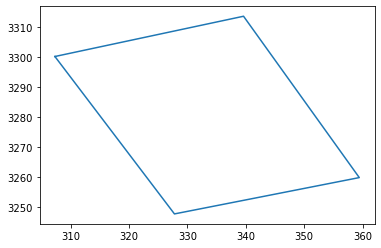

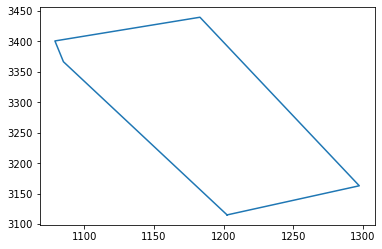

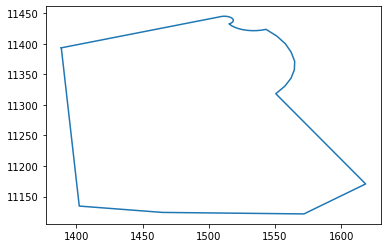

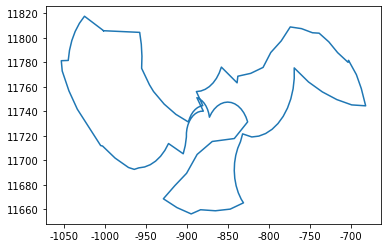

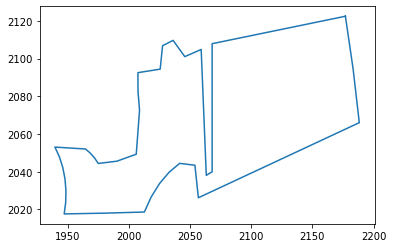

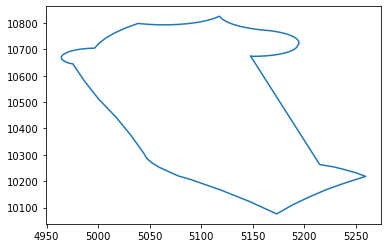

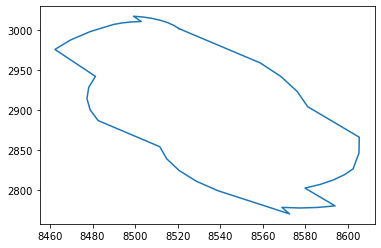

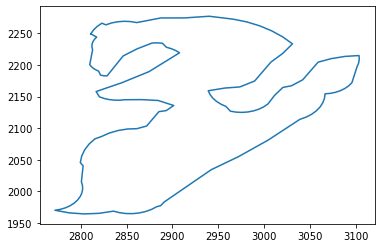

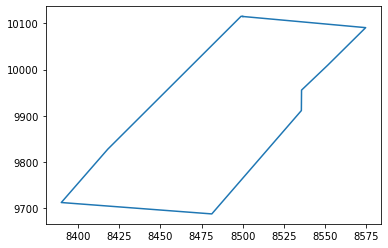

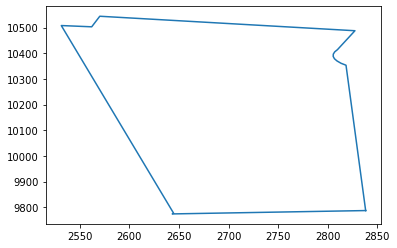

In [4]:
import matplotlib.pyplot as plt
   
fin=open('polygon.dat')

n=fin.readline()  #n=10

for i in range(int(n)):   # n=10
    n2=fin.readline()     # n2=5
    X=[]
    Y=[]
    
    for i in range(int(n2)): # n2=5    ####  要減 1 減少 計算的次數

        line = fin.readline()
        s1 , s2 = line.split()
        x = float(s1)
        y = float(s2)
        X.append(x)
        Y.append(y)
        
    plt.plot(X, Y)  
    plt.show()
   

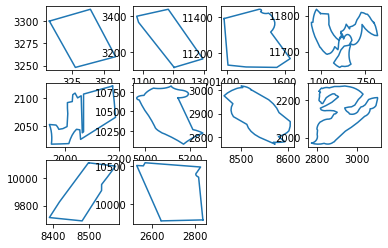

In [5]:
import matplotlib.pyplot as plt

fin=open('polygon.dat')

n=fin.readline()  #n=10

for i in range(int(n)):   # n=10
    n2=fin.readline()     # n2=5
    X=[]
    Y=[]
    
    for k in range(int(n2)): # n2=5    

        line = fin.readline()
        s1 , s2 = line.split()
        x = float(s1)
        y = float(s2)
        X.append(x)
        Y.append(y)
        
    plt.subplot(3,4,i+1)
    plt.plot(X, Y) 

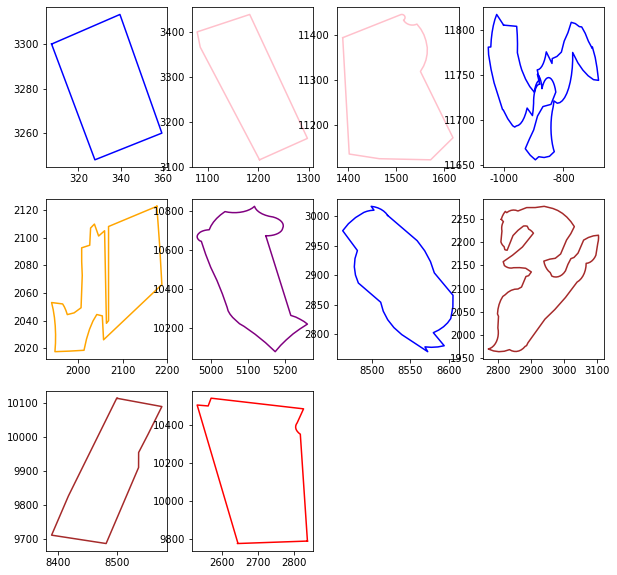

In [6]:
import matplotlib.pyplot as plt
import random
plt.rcParams["figure.figsize"] = (10, 10)

fin=open('polygon.dat')

n=fin.readline()  #n=10

for i in range(int(n)):   # n=10
    n2=fin.readline()     # n2=5
    X=[]
    Y=[]
    
    for k in range(int(n2)): # n2=5    

        line = fin.readline()
        s1 , s2 = line.split()
        x = float(s1)
        y = float(s2)
        X.append(x)
        Y.append(y)
        
    plt.subplot(3,4,i+1)
    color=random.choice(["r","b","g","c","m","y","pink","purple","orange","brown"])
    plt.plot(X, Y,c=color) 

In [7]:
import random
random.choice(["r","b","g","c","m","y","pink","purple","orange","brown"])

'brown'

In [8]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


<AxesSubplot:>

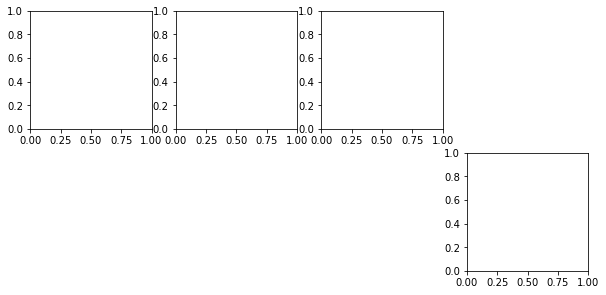

In [9]:
plt.subplot(4,4,3)
plt.subplot(4,4,2)
plt.subplot(4,4,1)
plt.subplot(4,4,8)

<AxesSubplot:>

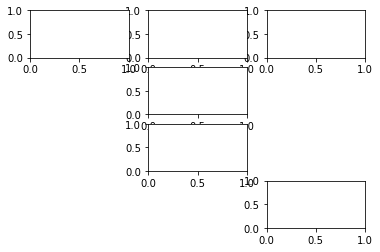

In [96]:
plt.subplot(4,3,3)
plt.subplot(4,3,2)
plt.subplot(4,3,1)
plt.subplot(4,3,5)
plt.subplot(4,3,8)
plt.subplot(4,3,12)

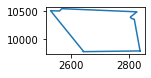

In [82]:
plt.subplot(4,3,1)
plt.plot(X, Y)

<AxesSubplot:>

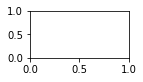

In [81]:
plt.subplot(4,3,1)

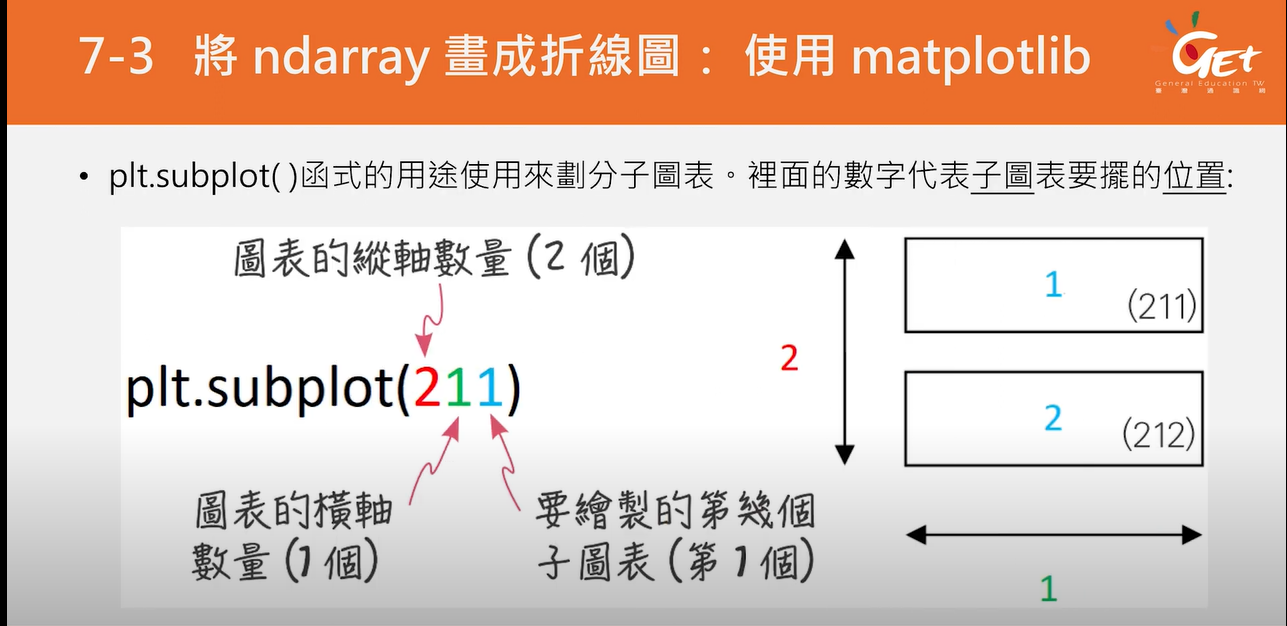

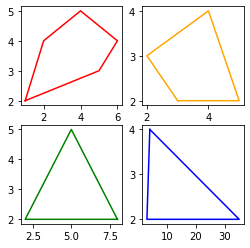

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)

xs = [1, 2, 4, 6, 5, 1]
ys = [2, 4, 5, 4, 3, 2]

xw=[3,2,4,5,3]
yw=[2,3,4,2,2]

xx=[8,5,2,2,8]
yy=[2,5,2,2,2]

xz=[4,35,3,4]
yz=[4,2,2,4]


plt.subplot(2,2,1)
plt.plot(xs, ys,c="r")

plt.subplot(2,2,2)
plt.plot(xw,yw,c="orange")

plt.subplot(2,2,3)
plt.plot(xx,yy,c="green")

plt.subplot(2,2,4)
plt.plot(xz,yz,c="blue")

plt.show()

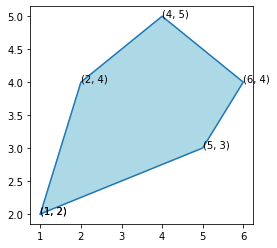

In [12]:
import matplotlib.pyplot as plt

xs=[1,2,4,6,5,1]
ys=[2,4,5,4,3,2]

plt.plot(xs, ys)

for x,y in zip(xs, ys):
    
    plt.annotate((x,y), (x,y),  xycoords='data',  xytext=(x,y))
    
plt.fill([1,2,4,6,5,1],[2,4,5,4,3,2],c="lightblue")

plt.show()

In [1]:
t=3

In [2]:
t

3